# Zomato Data Analysis Project

# Step 1
## Download or Importing some Libraries
## Such As Pandas,numpy,matplotlib.pyplot,seaborn

### pandas is used for data manipulation and analysis.
### numpy is used for numerical operations.
### matplotlib.pyplot and seaborn are used for data visualization.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2
## Create The Data Frame

In [18]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Step 3
## Data Clearning

### let's convert the data type of the "rate" column to float and remove the denominator.

In [19]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate' ]=dataframe['rate' ].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Summary of Data Frame

In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# No NULL Values

# Step 4
## Start Analysing

# Q1. What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'Type Of Restaurant')

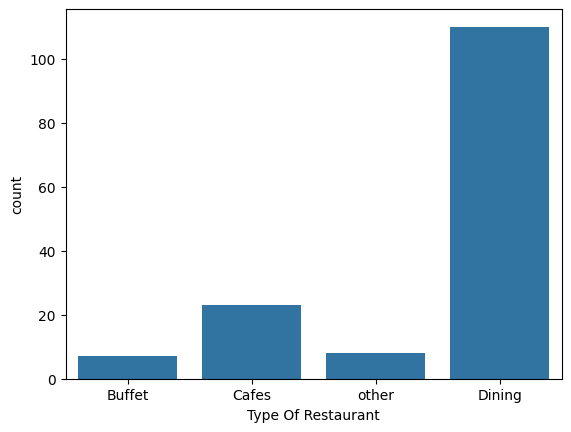

In [22]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type Of Restaurant')

### Conclusion - The Majority of the restaurants fall into the dinning category.

# Q2. How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'Votes')

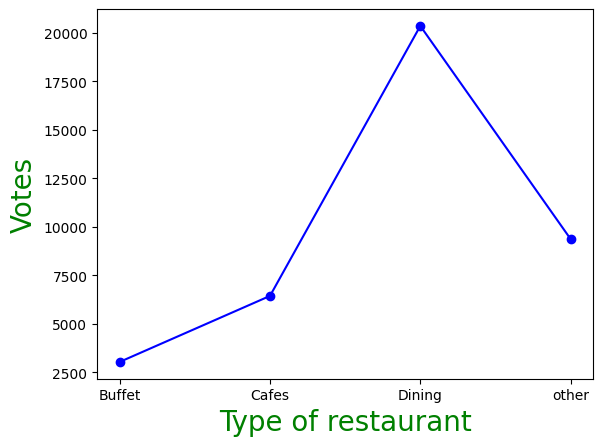

In [24]:
grouped_data = dataframe.groupby('listed_in(type)')['votes' ].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of restaurant", c="green", size=20)
plt.ylabel("Votes", c="green", size=20)

# Q3. What are the ratings that the majority of restaurants have received?

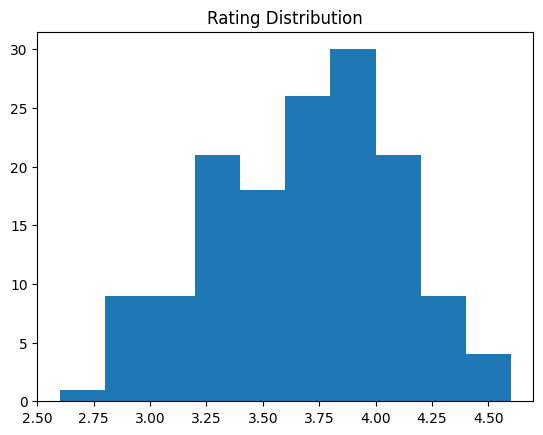

In [26]:
plt.hist(dataframe['rate'],bins=10)
plt.title("Rating Distribution")
plt.show()

### Conclusion -  The Majority of restaurants received rating from 3.5 to 4

# Q4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

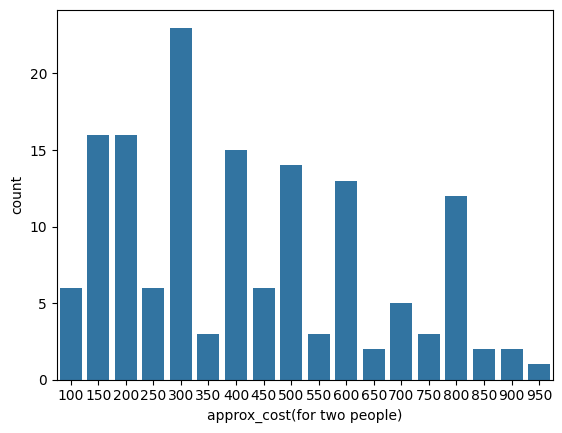

In [27]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conclusion - The Majority of Couples prefer restaurants with an approximate cost of 300₹.

# Q5. Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

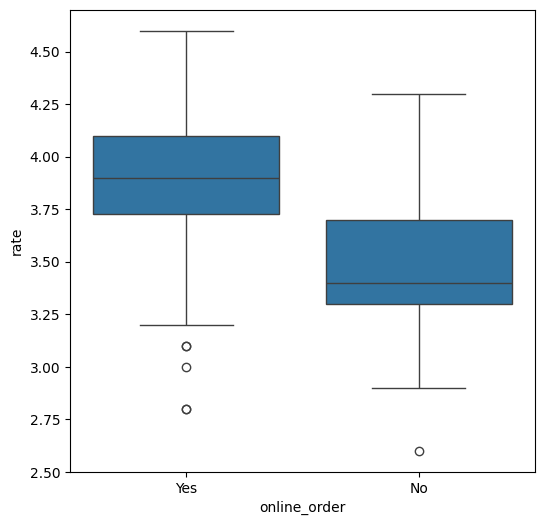

In [29]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

### Conclusion - Offline orders received lower rating in comparison to online orders, which obtained excellent ratings.

# Q6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

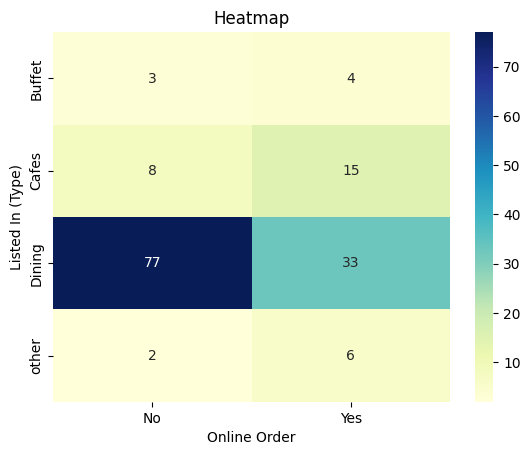

In [33]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value=0)
sns. heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

### Conclusion - Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.